# Customer churn prediction for a Telecommunications Company

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [10]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Drop nulls in TotalCharges

df.dropna(subset=['TotalCharges'], inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_replace:
    print(df[col].unique(), sep='\n')

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [15]:
for col in cols_to_replace:
    df[col].replace('No internet service', 'No', inplace=True)
    
for col in cols_to_replace:
    print(df[col].unique(), sep='\n')

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


# EDA

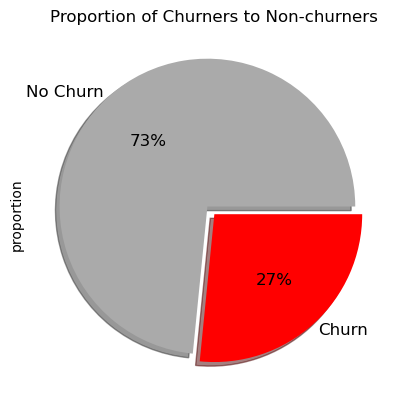

In [16]:
# What is the churn percentage?

plt.figure()
percents = df['Churn'].value_counts(normalize=True) * 100
percents.plot(kind='pie',
              autopct='%.0f%%',
              textprops={'fontsize': '12'},
              explode=(0.07, 0),
              shadow={'edgecolor': 'none', 'shade': 0.5},
              colors=['#aaa', 'red'],
              labeldistance=1.05,
              labels=['No Churn', 'Churn'])

plt.title('Proportion of Churners to Non-churners')
plt.show()

In [17]:
# A churn rate of 27% is high

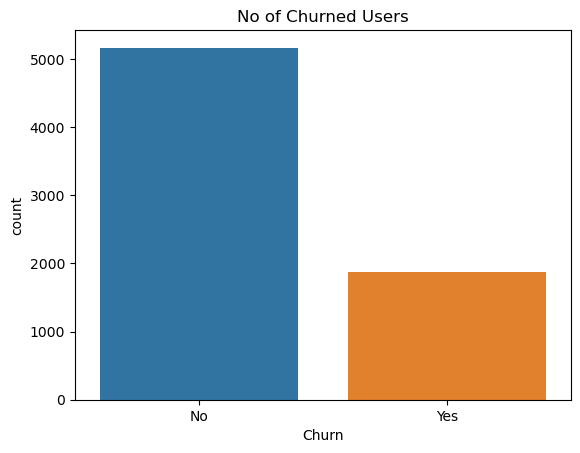

In [18]:
# How many users churned?

plt.figure()
sns.countplot(x='Churn', data=df)

plt.title('No of Churned Users');

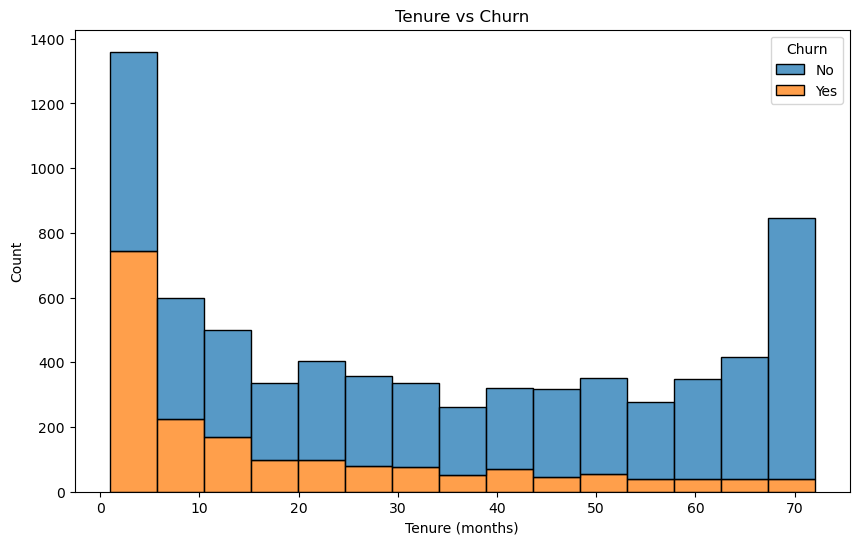

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(x='tenure', hue='Churn', data=df, multiple='stack');

plt.xlabel('Tenure (months)')
plt.title('Tenure vs Churn');

In [20]:
# Customers with shorter tenure are more likely to churn
# The likelihood of churn decreases with increase in tenure

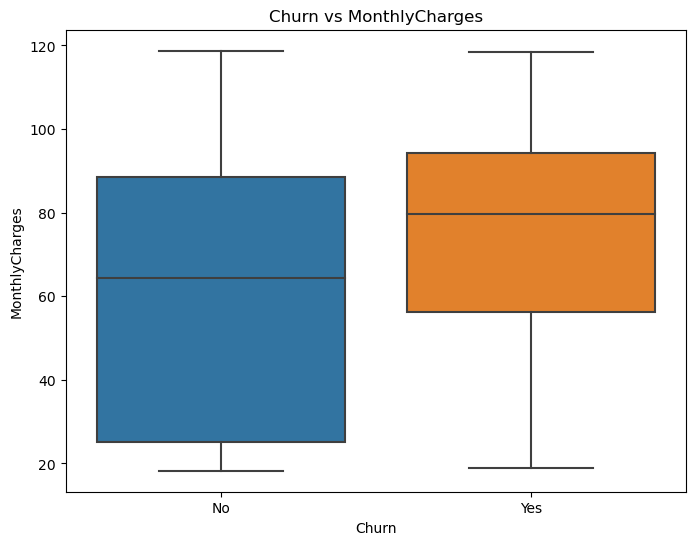

In [21]:
# Monthly charges vs Churn

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df);
plt.title('Churn vs MonthlyCharges');

In [22]:
# Customers have higher monthly charges tend to churn.
# The median monthly charge of churned customers is higher than those who non-churners

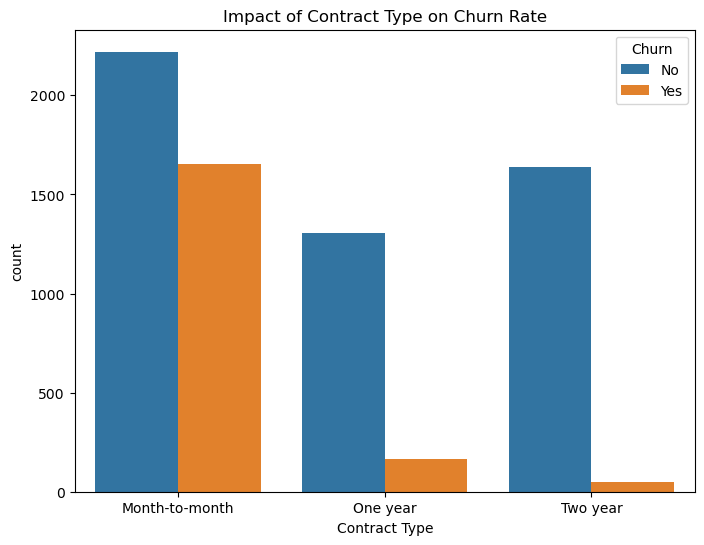

In [23]:
# The impact of contract type on churn

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df);
plt.title('Impact of Contract Type on Churn Rate')
plt.xlabel('Contract Type');

In [24]:
# Customers with m-to-m contracts are most likely to churn
# Longer contracts have LOWER churn rates

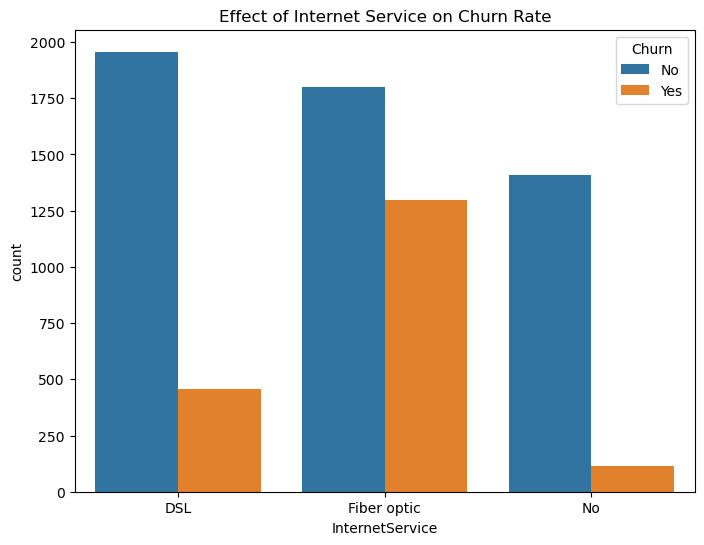

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)

plt.title('Effect of Internet Service on Churn Rate')
plt.xlabel('InternetService');

In [26]:
# Customers using the Fibre Optic service tend to have higher churn rates

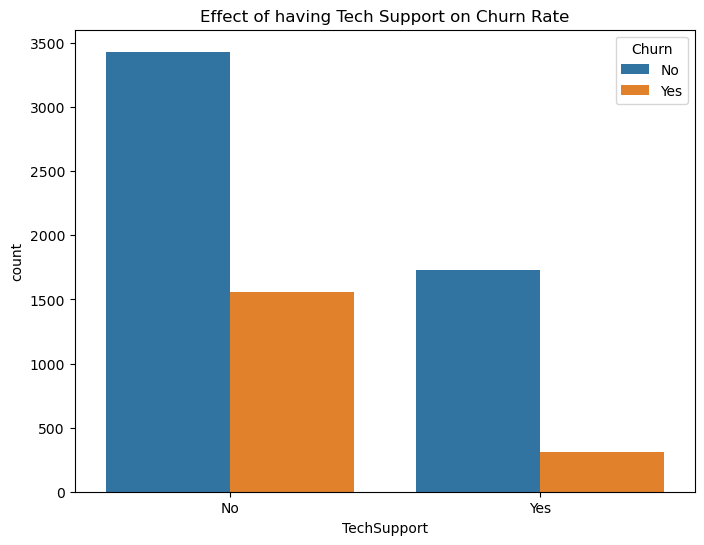

In [27]:
plt.figure(figsize=(8, 6))
plt.title('Effect of having Tech Support on Churn Rate');

sns.countplot(x='TechSupport', hue='Churn', data=df);

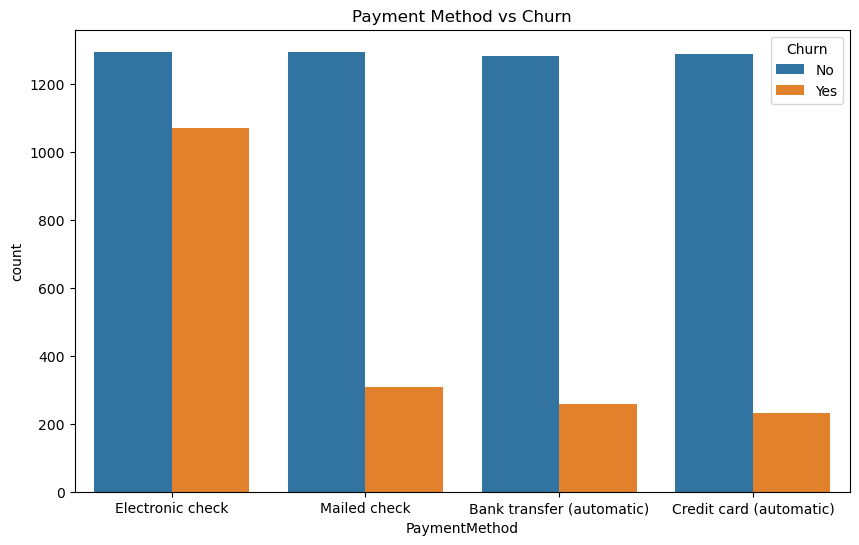

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Payment Method vs Churn');
sns.countplot(x='PaymentMethod', hue='Churn', data=df);

In [29]:
# Customers using the Electronic Check payment method have a higher churn

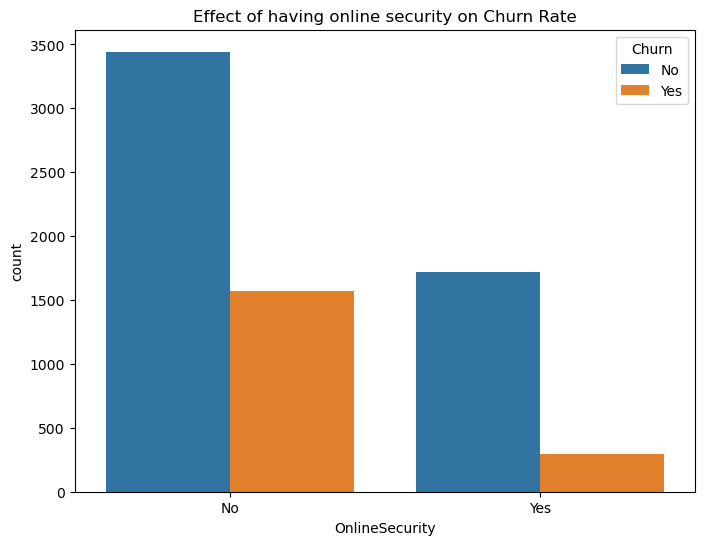

In [30]:
plt.figure(figsize=(8, 6))

sns.countplot(x='OnlineSecurity', hue='Churn', data=df);
plt.title('Effect of having online security on Churn Rate');

In [31]:
# Customers with no online security have a high tendency to churn

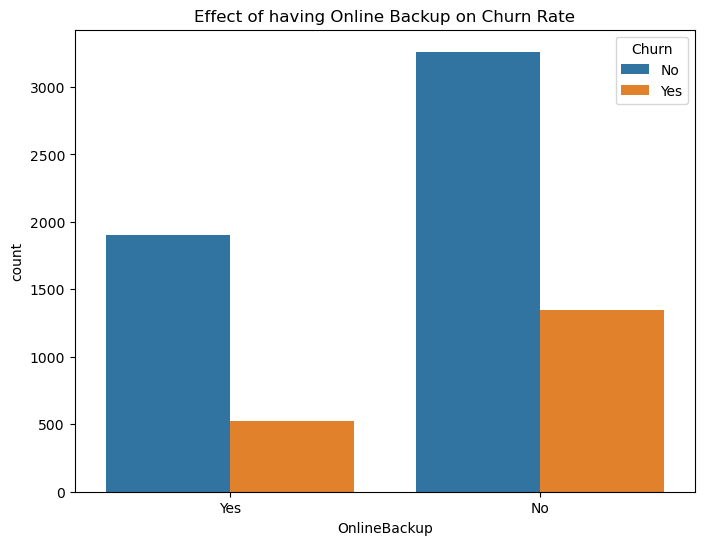

In [32]:
plt.figure(figsize=(8, 6))

sns.countplot(x='OnlineBackup', hue='Churn', data=df);
plt.title('Effect of having Online Backup on Churn Rate');

In [33]:
# Customers not having online backup are likely to churn

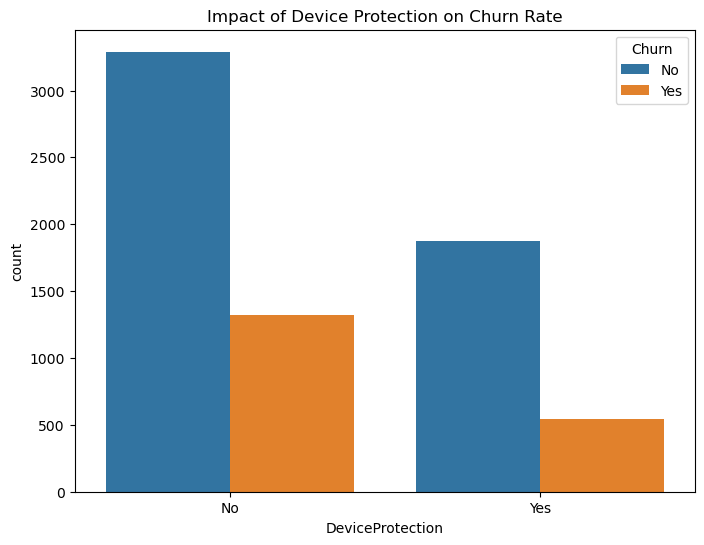

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', hue='Churn', data=df);
plt.title('Impact of Device Protection on Churn Rate');

In [35]:
# Customers with no device protection are likely to churn

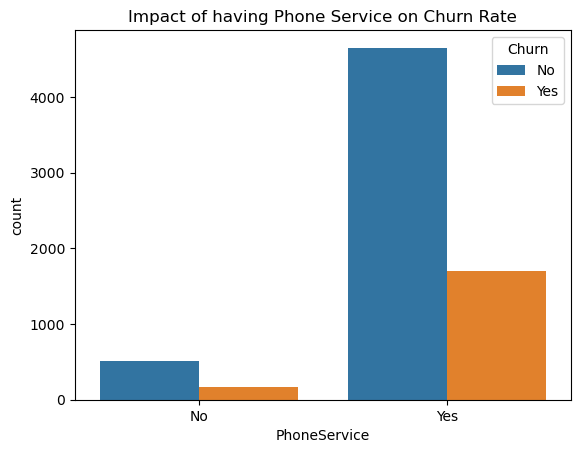

In [36]:
sns.countplot(x='PhoneService', hue='Churn', data=df);
plt.title('Impact of having Phone Service on Churn Rate');

In [37]:
# Customers who have phone service have a higher tendency to churn than those who don't.

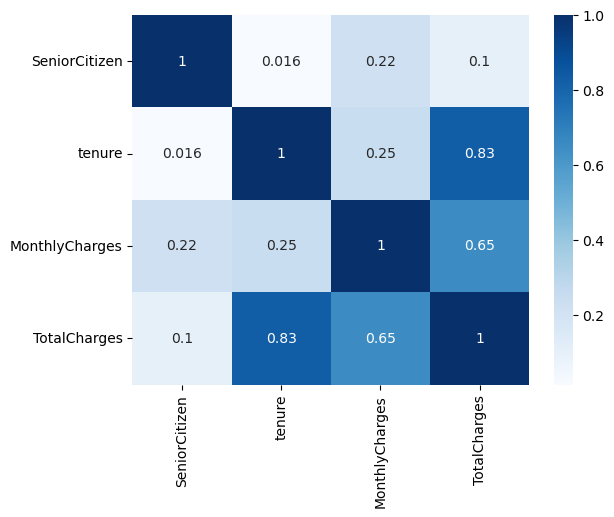

In [38]:
sns.heatmap(df.select_dtypes(['int', 'float']).corr(), annot=True, cmap='Blues');

## Feature Engineering

In [39]:
df.drop(columns=['customerID'], inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
# Select features & target
X = df.drop(columns='Churn')
y = df['Churn']

In [42]:
# Encode categorical columns
lenc = LabelEncoder()
for col in X.select_dtypes('object'):
    X[col] = lenc.fit_transform(X[col])
    
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [43]:
y = y.replace({'Yes': 1, 'No': 0})
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [44]:
# Check class imbalance
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [45]:
# Oversample data in minority class
from imblearn.over_sampling import SMOTE

SM = SMOTE(random_state=41)
X_smote, y_smote = SM.fit_resample(X, y)
y_smote.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [46]:
# Split data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=52)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [48]:
# Train the Random Forest classifier
forest = RandomForestClassifier(n_estimators=55, max_depth=13, random_state=44)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=55, random_state=44)

In [49]:
# Predict test data
y_pred = forest.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [50]:
# Classification accuracy
metrics.accuracy_score(y_test, y_pred)

0.8359148112294289

In [51]:
metrics.f1_score(y_test, y_pred)

0.8400188768286928

In [52]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1051
           1       0.81      0.88      0.84      1015

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [53]:
# Confusion metrics
metrics.confusion_matrix(y_test, y_pred)

array([[837, 214],
       [125, 890]], dtype=int64)

In [83]:
# Feature importances judged by Random Forest model
forest.feature_importances_

array([0.02087414, 0.01067174, 0.02832467, 0.03785999, 0.14392584,
       0.01051898, 0.01676476, 0.06489779, 0.05156515, 0.02415638,
       0.01808533, 0.05717795, 0.01249238, 0.01181997, 0.17381698,
       0.01423525, 0.03897191, 0.14803498, 0.1158058 ])

In [94]:
import sklearn

def get_feature_importances_table(forest: sklearn.ensemble._forest.RandomForestClassifier,
                                  feature_names=forest.feature_names_in_):
    to_percent = lambda x: int(np.round(x*100))
    table = pd.DataFrame({'features': feature_names, 'importance (%)': map(to_percent, forest.feature_importances_)})
    return table.sort_values('importance (%)', ascending=False)

In [95]:
table = get_feature_importances_table(forest)
table

,features,importance (%)
14,Contract,17
17,MonthlyCharges,15
4,tenure,14
18,TotalCharges,12
11,TechSupport,6
7,InternetService,6
8,OnlineSecurity,5
3,Dependents,4
16,PaymentMethod,4
2,Partner,3


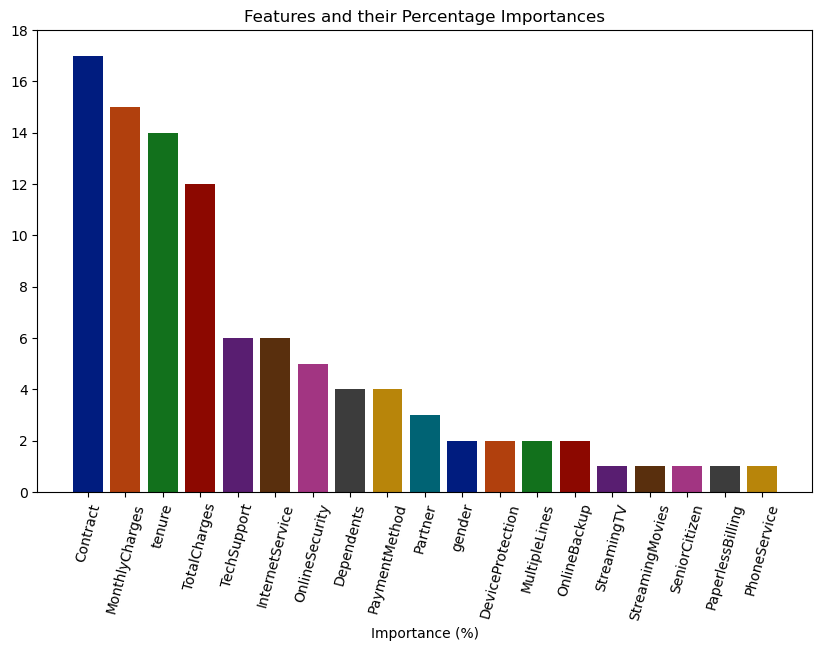

In [87]:
plt.figure(figsize=(10, 6))

plt.bar(table.features,
        table['importance (%)'],
        color=sns.color_palette('dark'))

plt.title('Features and their Percentage Importances')
plt.xlabel('Feature')
plt.xlabel('Importance (%)')
plt.xticks(rotation=75)
plt.ylim(0, 1 + table['importance (%)'].max())
plt.show()

In [97]:
least_features = features_info[features_info['importance (%)'] <=1].features
least_features

12         StreamingTV
13     StreamingMovies
1        SeniorCitizen
15    PaperlessBilling
5         PhoneService
Name: features, dtype: object

In [104]:
X_smote_final = X_smote.drop(columns=least_features)
X_smote_final.head(3)

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,1,0,0,1,0,0,0,2,29.85,29.85
1,1,0,0,34,0,0,1,0,1,0,1,3,56.95,1889.50
2,1,0,0,2,0,0,1,1,0,0,0,3,53.85,108.15


In [105]:
# Create a new model and train with full data
forest_final = RandomForestClassifier(n_estimators=55, max_depth=13, random_state=44)
forest_final.fit(X_smote_final, y_smote)

RandomForestClassifier(max_depth=13, n_estimators=55, random_state=44)

In [109]:
table_final = get_feature_importances_table(forest_final, X_smote_final.columns)
table_final.reset_index(drop=True)

,features,importance (%)
0,Contract,18
1,MonthlyCharges,14
2,TotalCharges,14
3,tenure,12
4,InternetService,8
5,OnlineSecurity,6
6,TechSupport,6
7,PaymentMethod,5
8,Partner,4
9,Dependents,3


In [110]:
import joblib
joblib.dump(forest_final, 'forest_final_churn.pkl')

['forest_final_churn.pkl']

# Using Logistic Regression

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [269]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Chima Orji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [271]:
y_pred_log = logmodel.predict(X_test)
y_pred_log

array([1, 1, 1, ..., 1, 0, 1])

In [272]:
metrics.accuracy_score(y_test, y_pred_log)

0.8020329138431752

In [273]:
print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1051
           1       0.77      0.84      0.81      1015

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



#### Conclusion: The Random Forest model is a better model!

In [111]:
interpret_pred = lambda val: 'CHURN' if val else 'WONT_CHURN'

In [115]:
def predict_customer_churn(val, whichmodel='first'): # model:'first' | 'final'
    model = finalforest if whichmodel=='final' else forest
    if whichmodel=='final':
        val = val.drop(columns=least_features, axis=1)
        
    preds = model.predict(val)
    return list(map(interpret_pred, preds))

In [117]:
customers = X_test[10:15]

print(predict_customer_churn(customers, 'first'))
pd.concat([y_test[10:15], customers], axis=1)

['WONT_CHURN', 'WONT_CHURN', 'CHURN', 'CHURN', 'CHURN']


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2414,0,0,0,0,0,11,1,0,0,0,0,1,1,0,0,1,0,0,53.800000,651.550000
2464,0,0,0,0,0,29,1,0,2,0,0,0,0,0,0,1,0,3,20.000000,599.300000
9095,1,0,0,0,0,6,1,0,1,0,0,0,0,0,0,0,1,2,79.986127,523.193269
10156,1,0,0,1,0,27,1,0,1,0,0,0,0,0,1,0,1,2,82.300920,2227.508358
5277,1,1,0,1,0,8,1,0,1,1,0,0,0,0,0,0,1,2,74.500000,609.900000


In [436]:
from joblib import load, dump

In [438]:
dump(forest, 'forest_churn_83.pkl')

['forest_churn_83.pkl']